In [10]:
import sys
sys.path.append('../ML/')

In [11]:
import pandas as pd

years = [year for year in range(2018, 2023)] # start year to 2022
location = '臺中'
dfs = []
for year in years:
    df = pd.read_csv(f'./concat-data/{location}/{year}.csv')
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True) # all data from 2018 to 2022
# df = clean(df) # clean df, e.g., nan handling, rename columns, ...
df

egg_TaijinPrice Duckegg_TNN_TaijinPrice      入中雞雛數        產蛋隻數  \
0               24.5                    34.0  1160830.0  31170982.0   
1               24.5                    34.0  1160830.0  31170982.0   
2               26.5                    34.0  1160830.0  31170982.0   
3               26.5                    34.0  1160830.0  31170982.0   
4               26.5                    34.0  1160830.0  31170982.0   
...              ...                     ...        ...         ...   
1821            40.5                    43.0  1592549.0  35037318.0   
1822            40.5                    43.0  1592549.0  35037318.0   
1823            40.5                    43.0  1592549.0  35037318.0   
1824            40.5                    43.0  1592549.0  35037318.0   
1825            40.5                    43.0  1592549.0  35037318.0   

      均  日     產蛋箱數       淘汰隻數  目  前         換羽隻數        Date  \
0          114908.0   866824.0           633700.0  2018-01-01   
1          114908.0   866824.0           633700.0  2018-01-02   
2          114908.0   866824.0           633700.0  2018-01-03   
3          114908.0   866824.0           633700.0  2018-01-04   
4          114908.0   866824.0           633700.0  2018-01-05   
...             ...        ...                ...         ...   
1821       122636.0  1203140.0           990135.0  2022-12-27   
1822       122636.0  1203140.0           990135.0  2022-12-28   
1823       122636.0  1203140.0           990135.0  2022-12-29   
1824       122636.0  1203140.0           990135.0  2022-12-30   
1825       122636.0  1203140.0           990135.0  2022-12-31   

      WhiteChickQuantity  RedChickQuantity  ImportChickenQuantity    玉米粒  \
0                 245600             84800                    0.0   6.10   
1                 245600             84800                    0.0   6.10   
2                 245600             84800                    0.0   6.10   
3                 245600             84800                    0.0   6.10   
4                 245600             84800                    0.0   6.10   
...                  ...               ...                    ...    ...   
1821              387890             83670                    NaN  10.85   
1822              387890             83670                    NaN  11.05   
1823              353700             91500                    NaN  11.05   
1824              353700             91500                    NaN  11.20   
1825              353700             91500                    NaN  11.20   

       黃豆粉    玉米粉   脫殼豆粉  高蛋白豆粉 StationName  AirTemperatureMean  \
0     12.15   6.65  13.3  13.21          臺中                17.3   
1     12.15   6.65  13.3  13.21          臺中                17.3   
2     12.15   6.65  13.3  13.21          臺中                17.3   
3     12.15   6.63  13.3  13.21          臺中                17.3   
4     12.15   6.63  13.3  13.20          臺中                17.3   
...     ...    ...   ...    ...         ...                 ...   
1821  19.90  11.60  21.1  21.00          臺中                17.8   
1822  19.90  11.68  21.1  21.00          臺中                17.8   
1823  19.90  11.78  21.1  21.00          臺中                17.8   
1824  19.90  11.78  21.1  21.00          臺中                17.8   
1825  19.90  11.78  21.1  21.00          臺中                17.8   

      AirTemperatureMax Precipitation  
0                  27.2           0.0  
1                  27.2           0.0  
2                  27.2           0.0  
3                  27.2           4.0  
4                  27.2           0.5  
...                 ...           ...  
1821               28.1           0.0  
1822               28.1           0.0  
1823               28.1             T  
1824               28.1           0.0  
1825               28.1           0.0  

[1826 rows x 20 columns]

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df = df.drop(columns=['StationName'])
# rename columns
new_columns = {
    'egg_TaijinPrice':"EggPrice", 
    'Duckegg_TNN_TaijinPrice': "DuckEggPrice", 
    '入中雞雛數':"NumRuChung",
    '產蛋隻數':"NumOfChickLayingEggs",
    '均  日     產蛋箱數':"BoxesOfEggsPerDay", 
    '淘汰隻數':"NumDisuse", 
    '目  前         換羽隻數':"NumMoulting", 
    'WhiteChickQuantity':"WhiteChickQuantity",
    'RedChickQuantity':"RedChickQuantity", 
    'ImportChickenQuantity':"ImportChickenQuantity", 
    ' 玉米粒':"Corn", 
    ' 黃豆粉 ':"SoyBeanFlour", 
    '玉米粉 ':"CornFlour",
    '脫殼豆粉':"DehulledBeanFlour", 
    '高蛋白豆粉':"HighProteinBeanFlour", 
    'AirTemperatureMean':"AirTemperatureMean", 
    'AirTemperatureMax':"AirTemperatureMax",
    'Precipitation':"Precipitation"
}
df = df.rename(columns=new_columns)

# 將所有資料轉成數字，不是數字的資料會變成 NaN
df = df.apply(pd.to_numeric, errors='coerce')

# 空值全部填 0
df = df.fillna(float(0))
df

EggPrice  DuckEggPrice  NumRuChung  NumOfChickLayingEggs  \
Date                                                                   
2018-01-01      24.5          34.0   1160830.0            31170982.0   
2018-01-02      24.5          34.0   1160830.0            31170982.0   
2018-01-03      26.5          34.0   1160830.0            31170982.0   
2018-01-04      26.5          34.0   1160830.0            31170982.0   
2018-01-05      26.5          34.0   1160830.0            31170982.0   
...              ...           ...         ...                   ...   
2022-12-27      40.5          43.0   1592549.0            35037318.0   
2022-12-28      40.5          43.0   1592549.0            35037318.0   
2022-12-29      40.5          43.0   1592549.0            35037318.0   
2022-12-30      40.5          43.0   1592549.0            35037318.0   
2022-12-31      40.5          43.0   1592549.0            35037318.0   

            BoxesOfEggsPerDay  NumDisuse  NumMoulting  WhiteChickQuantity  \
Date                                                                        
2018-01-01           114908.0   866824.0     633700.0              245600   
2018-01-02           114908.0   866824.0     633700.0              245600   
2018-01-03           114908.0   866824.0     633700.0              245600   
2018-01-04           114908.0   866824.0     633700.0              245600   
2018-01-05           114908.0   866824.0     633700.0              245600   
...                       ...        ...          ...                 ...   
2022-12-27           122636.0  1203140.0     990135.0              387890   
2022-12-28           122636.0  1203140.0     990135.0              387890   
2022-12-29           122636.0  1203140.0     990135.0              353700   
2022-12-30           122636.0  1203140.0     990135.0              353700   
2022-12-31           122636.0  1203140.0     990135.0              353700   

            RedChickQuantity  ImportChickenQuantity   Corn  SoyBeanFlour  \
Date                                                                       
2018-01-01             84800                    0.0   6.10         12.15   
2018-01-02             84800                    0.0   6.10         12.15   
2018-01-03             84800                    0.0   6.10         12.15   
2018-01-04             84800                    0.0   6.10         12.15   
2018-01-05             84800                    0.0   6.10         12.15   
...                      ...                    ...    ...           ...   
2022-12-27             83670                    0.0  10.85         19.90   
2022-12-28             83670                    0.0  11.05         19.90   
2022-12-29             91500                    0.0  11.05         19.90   
2022-12-30             91500                    0.0  11.20         19.90   
2022-12-31             91500                    0.0  11.20         19.90   

            CornFlour  DehulledBeanFlour  HighProteinBeanFlour  \
Date                                                             
2018-01-01       6.65               13.3                 13.21   
2018-01-02       6.65               13.3                 13.21   
2018-01-03       6.65               13.3                 13.21   
2018-01-04       6.63               13.3                 13.21   
2018-01-05       6.63               13.3                 13.20   
...               ...                ...                   ...   
2022-12-27      11.60               21.1                 21.00   
2022-12-28      11.68               21.1                 21.00   
2022-12-29      11.78               21.1                 21.00   
2022-12-30      11.78               21.1                 21.00   
2022-12-31      11.78               21.1                 21.00   

            AirTemperatureMean  AirTemperatureMax  Precipitation  
Date                                                              
2018-01-01                17.3               27.2            0.0  
2018-01-02              

In [13]:
df_shift = df.loc['2018-07-01':'2022-12-31']
df_shift

EggPrice  DuckEggPrice  NumRuChung  NumOfChickLayingEggs  \
Date                                                                   
2018-07-01      27.5          32.0   1548978.0            29964977.0   
2018-07-02      27.5          32.0   1548978.0            29964977.0   
2018-07-03      27.5          32.0   1548978.0            29964977.0   
2018-07-04      27.5          34.0   1548978.0            29964977.0   
2018-07-05      27.5          34.0   1548978.0            29964977.0   
...              ...           ...         ...                   ...   
2022-12-27      40.5          43.0   1592549.0            35037318.0   
2022-12-28      40.5          43.0   1592549.0            35037318.0   
2022-12-29      40.5          43.0   1592549.0            35037318.0   
2022-12-30      40.5          43.0   1592549.0            35037318.0   
2022-12-31      40.5          43.0   1592549.0            35037318.0   

            BoxesOfEggsPerDay  NumDisuse  NumMoulting  WhiteChickQuantity  \
Date                                                                        
2018-07-01           108553.0   861380.0     687628.0              372700   
2018-07-02           108553.0   861380.0     687628.0              372700   
2018-07-03           108553.0   861380.0     687628.0              372700   
2018-07-04           108553.0   861380.0     687628.0              372700   
2018-07-05           108553.0   861380.0     687628.0              372700   
...                       ...        ...          ...                 ...   
2022-12-27           122636.0  1203140.0     990135.0              387890   
2022-12-28           122636.0  1203140.0     990135.0              387890   
2022-12-29           122636.0  1203140.0     990135.0              353700   
2022-12-30           122636.0  1203140.0     990135.0              353700   
2022-12-31           122636.0  1203140.0     990135.0              353700   

            RedChickQuantity  ImportChickenQuantity   Corn  SoyBeanFlour  \
Date                                                                       
2018-07-01             42600                21060.0   6.70         13.25   
2018-07-02             42600                21060.0   6.70         13.25   
2018-07-03             42600                21060.0   6.70         13.20   
2018-07-04             42600                21060.0   6.70         13.15   
2018-07-05             42600                21060.0   6.65         13.15   
...                      ...                    ...    ...           ...   
2022-12-27             83670                    0.0  10.85         19.90   
2022-12-28             83670                    0.0  11.05         19.90   
2022-12-29             91500                    0.0  11.05         19.90   
2022-12-30             91500                    0.0  11.20         19.90   
2022-12-31             91500                    0.0  11.20         19.90   

            CornFlour  DehulledBeanFlour  HighProteinBeanFlour  \
Date                                                             
2018-07-01       7.32              14.35                 14.21   
2018-07-02       7.32              14.35                 14.21   
2018-07-03       7.30              14.30                 14.14   
2018-07-04       7.28              14.30                 14.11   
2018-07-05       7.23              14.30                 14.11   
...               ...                ...                   ...   
2022-12-27      11.60              21.10                 21.00   
2022-12-28      11.68              21.10                 21.00   
2022-12-29      11.78              21.10                 21.00   
2022-12-30      11.78              21.10                 21.00   
2022-12-31      11.78              21.10                 21.00   

            AirTemperatureMean  AirTemperatureMax  Precipitation  
Date                                                              
2018-07-01                28.6               35.4           13.0  
2018-07-02              

In [14]:
from datetime import datetime, timedelta

days_befores = [30, 60, 90, 120, 150, 180]
features_to_extend = [
    'NumRuChung', 
    'NumOfChickLayingEggs', 
    'BoxesOfEggsPerDay', 
    'NumDisuse', 
    'NumMoulting', 
    'WhiteChickQuantity', 
    'RedChickQuantity', 
    'ImportChickenQuantity', 
    'Corn', 
    'SoyBeanFlour',
    'CornFlour', 
    'DehulledBeanFlour', 
    'HighProteinBeanFlour',
]
features_not_extended = [elem for elem in df_shift.columns if elem not in features_to_extend]

extend_columns = {feature: {day: [] for day in days_befores} for feature in features_to_extend}

def date_days_before(input_date, feature):
    # Convert input_date to a datetime object
    input_datetime = datetime.strptime(input_date, "%Y-%m-%d")

    for days_before in days_befores:
        result_datetime = input_datetime - timedelta(days=days_before) # Calculate some days before

        past_date = result_datetime.strftime("%Y-%m-%d") # Format and return the result as a string

        past_data = df.loc[past_date][feature] # find that data

        extend_columns[feature][days_before].append(past_data)


for idx in df_shift.index:
    date = str(idx)[:10] # idx = 2022-10-15 00:00:00, we only need the date
    for feat in extend_columns.keys():
        date_days_before(date, feat)

In [15]:
df_extended = df_shift.copy(deep=True)
extended_columns = [] # for plotting 

for feat, dict in extend_columns.items():
    for days, list in dict.items():
        extend_col_name = f'{feat}_{int(days/30)}'
        df_extended[extend_col_name] = list
        extended_columns.append(extend_col_name)

df_shift = df_extended

# remove the original columns of the extended ones
df_shift = df_shift.drop(features_to_extend, axis=1)

df_shift

EggPrice  DuckEggPrice  AirTemperatureMean  AirTemperatureMax  \
Date                                                                        
2018-07-01      27.5          32.0                28.6               35.4   
2018-07-02      27.5          32.0                28.6               35.4   
2018-07-03      27.5          32.0                28.6               35.4   
2018-07-04      27.5          34.0                28.6               35.4   
2018-07-05      27.5          34.0                28.6               35.4   
...              ...           ...                 ...                ...   
2022-12-27      40.5          43.0                17.8               28.1   
2022-12-28      40.5          43.0                17.8               28.1   
2022-12-29      40.5          43.0                17.8               28.1   
2022-12-30      40.5          43.0                17.8               28.1   
2022-12-31      40.5          43.0                17.8               28.1   

            Precipitation  NumRuChung_1  NumRuChung_2  NumRuChung_3  \
Date                                                                  
2018-07-01           13.0     1352635.0     1555965.0     1305120.0   
2018-07-02           67.5     1352635.0     1555965.0     1305120.0   
2018-07-03           46.0     1352635.0     1555965.0     1305120.0   
2018-07-04           31.0     1352635.0     1555965.0     1305120.0   
2018-07-05           13.0     1352635.0     1555965.0     1305120.0   
...                   ...           ...           ...           ...   
2022-12-27            0.0     1547765.0     1482554.0     1912212.0   
2022-12-28            0.0     1547765.0     1482554.0     1912212.0   
2022-12-29            0.0     1547765.0     1482554.0     1912212.0   
2022-12-30            0.0     1547765.0     1482554.0     1482554.0   
2022-12-31            0.0     1592549.0     1547765.0     1482554.0   

            NumRuChung_4  NumRuChung_5  ...  DehulledBeanFlour_3  \
Date                                    ...                        
2018-07-01     1445970.0     1017671.0  ...                 14.8   
2018-07-02     1445970.0     1017671.0  ...                 14.8   
2018-07-03     1445970.0     1017671.0  ...                 14.8   
2018-07-04     1445970.0     1017671.0  ...                 14.8   
2018-07-05     1445970.0     1017671.0  ...                 14.8   
...                  ...           ...  ...                  ...   
2022-12-27     1654430.0     1642580.0  ...                 20.5   
2022-12-28     1654430.0     1642580.0  ...                 20.5   
2022-12-29     1654430.0     1654430.0  ...                 20.5   
2022-12-30     1912212.0     1654430.0  ...                 20.5   
2022-12-31     1912212.0     1654430.0  ...                 20.5   

            DehulledBeanFlour_4  DehulledBeanFlour_5  DehulledBeanFlour_6  \
Date                                                                        
2018-07-01                 14.4                 13.4                 13.3   
2018-07-02                 14.5                 13.4                 13.3   
2018-07-03                 14.5                 13.4                 13.3   
2018-07-04                 14.5                 13.4                 13.3   
2018-07-05                 14.5                 13.4                 13.3   
...                         ...                  ...                  ...   
2022-12-27                 19.9                 19.2                 23.6   
2022-12-28                 19.9                 19.2                 18.7   
2022-12-29                 19.9                 11.7                 18.7   
2022-12-30                 19.9                 11.6                 18.7   
2022-12-31                 19.9                 11.5                 18.7   

            HighProteinBeanFlour_1  HighProteinBeanFlour_2  \
Date                                                         
2018-07-01                   14.75                   14.76   
2018-07-02   

In [16]:
"""
Highly relative feature list: (not extended)
DuckEggPrice            0.726912
NumRuChung              0.435494
Corn                    0.592012
SoyBeanFlour            0.635711
CornFlour               0.620423
DehulledBeanFlour       0.547041
HighProteinBeanFlour    0.639172
"""

'\nHighly relative feature list: (not extended)\nDuckEggPrice            0.726912\nNumRuChung              0.435494\nCorn                    0.592012\nSoyBeanFlour            0.635711\nCornFlour               0.620423\nDehulledBeanFlour       0.547041\nHighProteinBeanFlour    0.639172\n'

Number of selected features: 31 

Highly relative feature list:
DuckEggPrice              0.731987
Corn_1                    0.583691
Corn_2                    0.625401
Corn_3                    0.631921
Corn_4                    0.660566
Corn_5                    0.671084
Corn_6                    0.670482
SoyBeanFlour_1            0.591983
SoyBeanFlour_2            0.613008
SoyBeanFlour_3            0.590756
SoyBeanFlour_4            0.570220
SoyBeanFlour_5            0.551340
SoyBeanFlour_6            0.529676
CornFlour_1               0.606901
CornFlour_2               0.640753
CornFlour_3               0.657381
CornFlour_4               0.683974
CornFlour_5               0.684478
CornFlour_6               0.682916
DehulledBeanFlour_1       0.524395
DehulledBeanFlour_2       0.555826
DehulledBeanFlour_3       0.582212
DehulledBeanFlour_4       0.608746
DehulledBeanFlour_5       0.639264
DehulledBeanFlour_6       0.669838
HighProteinBeanFlour_1    0.591559
HighProteinBeanFlour_2    

DuckEggPrice  Corn_1  Corn_2  Corn_3  Corn_4  Corn_5  Corn_6  \
Date                                                                       
2018-07-01          32.0    7.30    7.05    8.05    6.90    6.23    6.10   
2018-07-02          32.0    7.30    7.15    8.05    7.05    6.23    6.10   
2018-07-03          32.0    7.30    7.30    8.05    7.05    6.23    6.10   
2018-07-04          34.0    7.30    7.30    8.05    7.10    6.23    6.10   
2018-07-05          34.0    7.30    7.30    8.05    7.15    6.30    6.10   
...                  ...     ...     ...     ...     ...     ...     ...   
2022-12-27          43.0   11.65   11.80   11.55   11.45   10.85   12.35   
2022-12-28          43.0   11.65   11.80   11.55   11.50   10.85   12.30   
2022-12-29          43.0   11.65   11.80   11.55   11.40   10.75   12.30   
2022-12-30          43.0   11.55   11.80   11.55   11.40   10.65   12.20   
2022-12-31          43.0   11.50   11.80   11.60   11.35   10.55   12.20   

            SoyBeanFlour_1  SoyBeanFlour_2  SoyBeanFlour_3  ...  \
Date                                                        ...   
2018-07-01           13.80            13.9            13.7  ...   
2018-07-02           13.80            13.9            13.7  ...   
2018-07-03           13.80            13.9            13.7  ...   
2018-07-04           13.80            13.9            13.7  ...   
2018-07-05           13.80            13.7            13.7  ...   
...                    ...             ...             ...  ...   
2022-12-27           19.80            19.3            19.3  ...   
2022-12-28           19.80            19.5            19.3  ...   
2022-12-29           19.80            19.5            19.3  ...   
2022-12-30           19.80            19.5            19.3  ...   
2022-12-31           19.85            19.5            19.3  ...   

            DehulledBeanFlour_4  DehulledBeanFlour_5  DehulledBeanFlour_6  \
Date                                                                        
2018-07-01                 14.4                 13.4                 13.3   
2018-07-02                 14.5                 13.4                 13.3   
2018-07-03                 14.5                 13.4                 13.3   
2018-07-04                 14.5                 13.4                 13.3   
2018-07-05                 14.5                 13.4                 13.3   
...                         ...                  ...                  ...   
2022-12-27                 19.9                 19.2                 23.6   
2022-12-28                 19.9                 19.2                 18.7   
2022-12-29                 19.9                 11.7                 18.7   
2022-12-30                 19.9                 11.6                 18.7   
2022-12-31                 19.9                 11.5                 18.7   

            HighProteinBeanFlour_1  HighProteinBeanFlour_2  \
Date                                                         
2018-07-01                   14.75                   14.76   
2018-07-02                   14.75                   14.73   
2018-07-03                   14.75                   14.78   
2018-07-04                   14.75                   14.78   
2018-07-05                   14.75                   14.70   
...                            ...                     ...   
2022-12-27                   20.90                   20.45   
2022-12-28                   20.90                   20.50   
2022-12-29                   20.90                   20.60   
2022-12-30                   21.00                   20.50   
2022-12-31                   21.10                   20.60   

            HighProteinBeanFlour_3  HighProteinBeanFlour_4  \
Date                                                         
2018-07-01                   14.70                   14.16   
2018-07-02                   14.67                   14.25   
2018-07-03                   14.67                   14.25   
2018-07-04                   14.

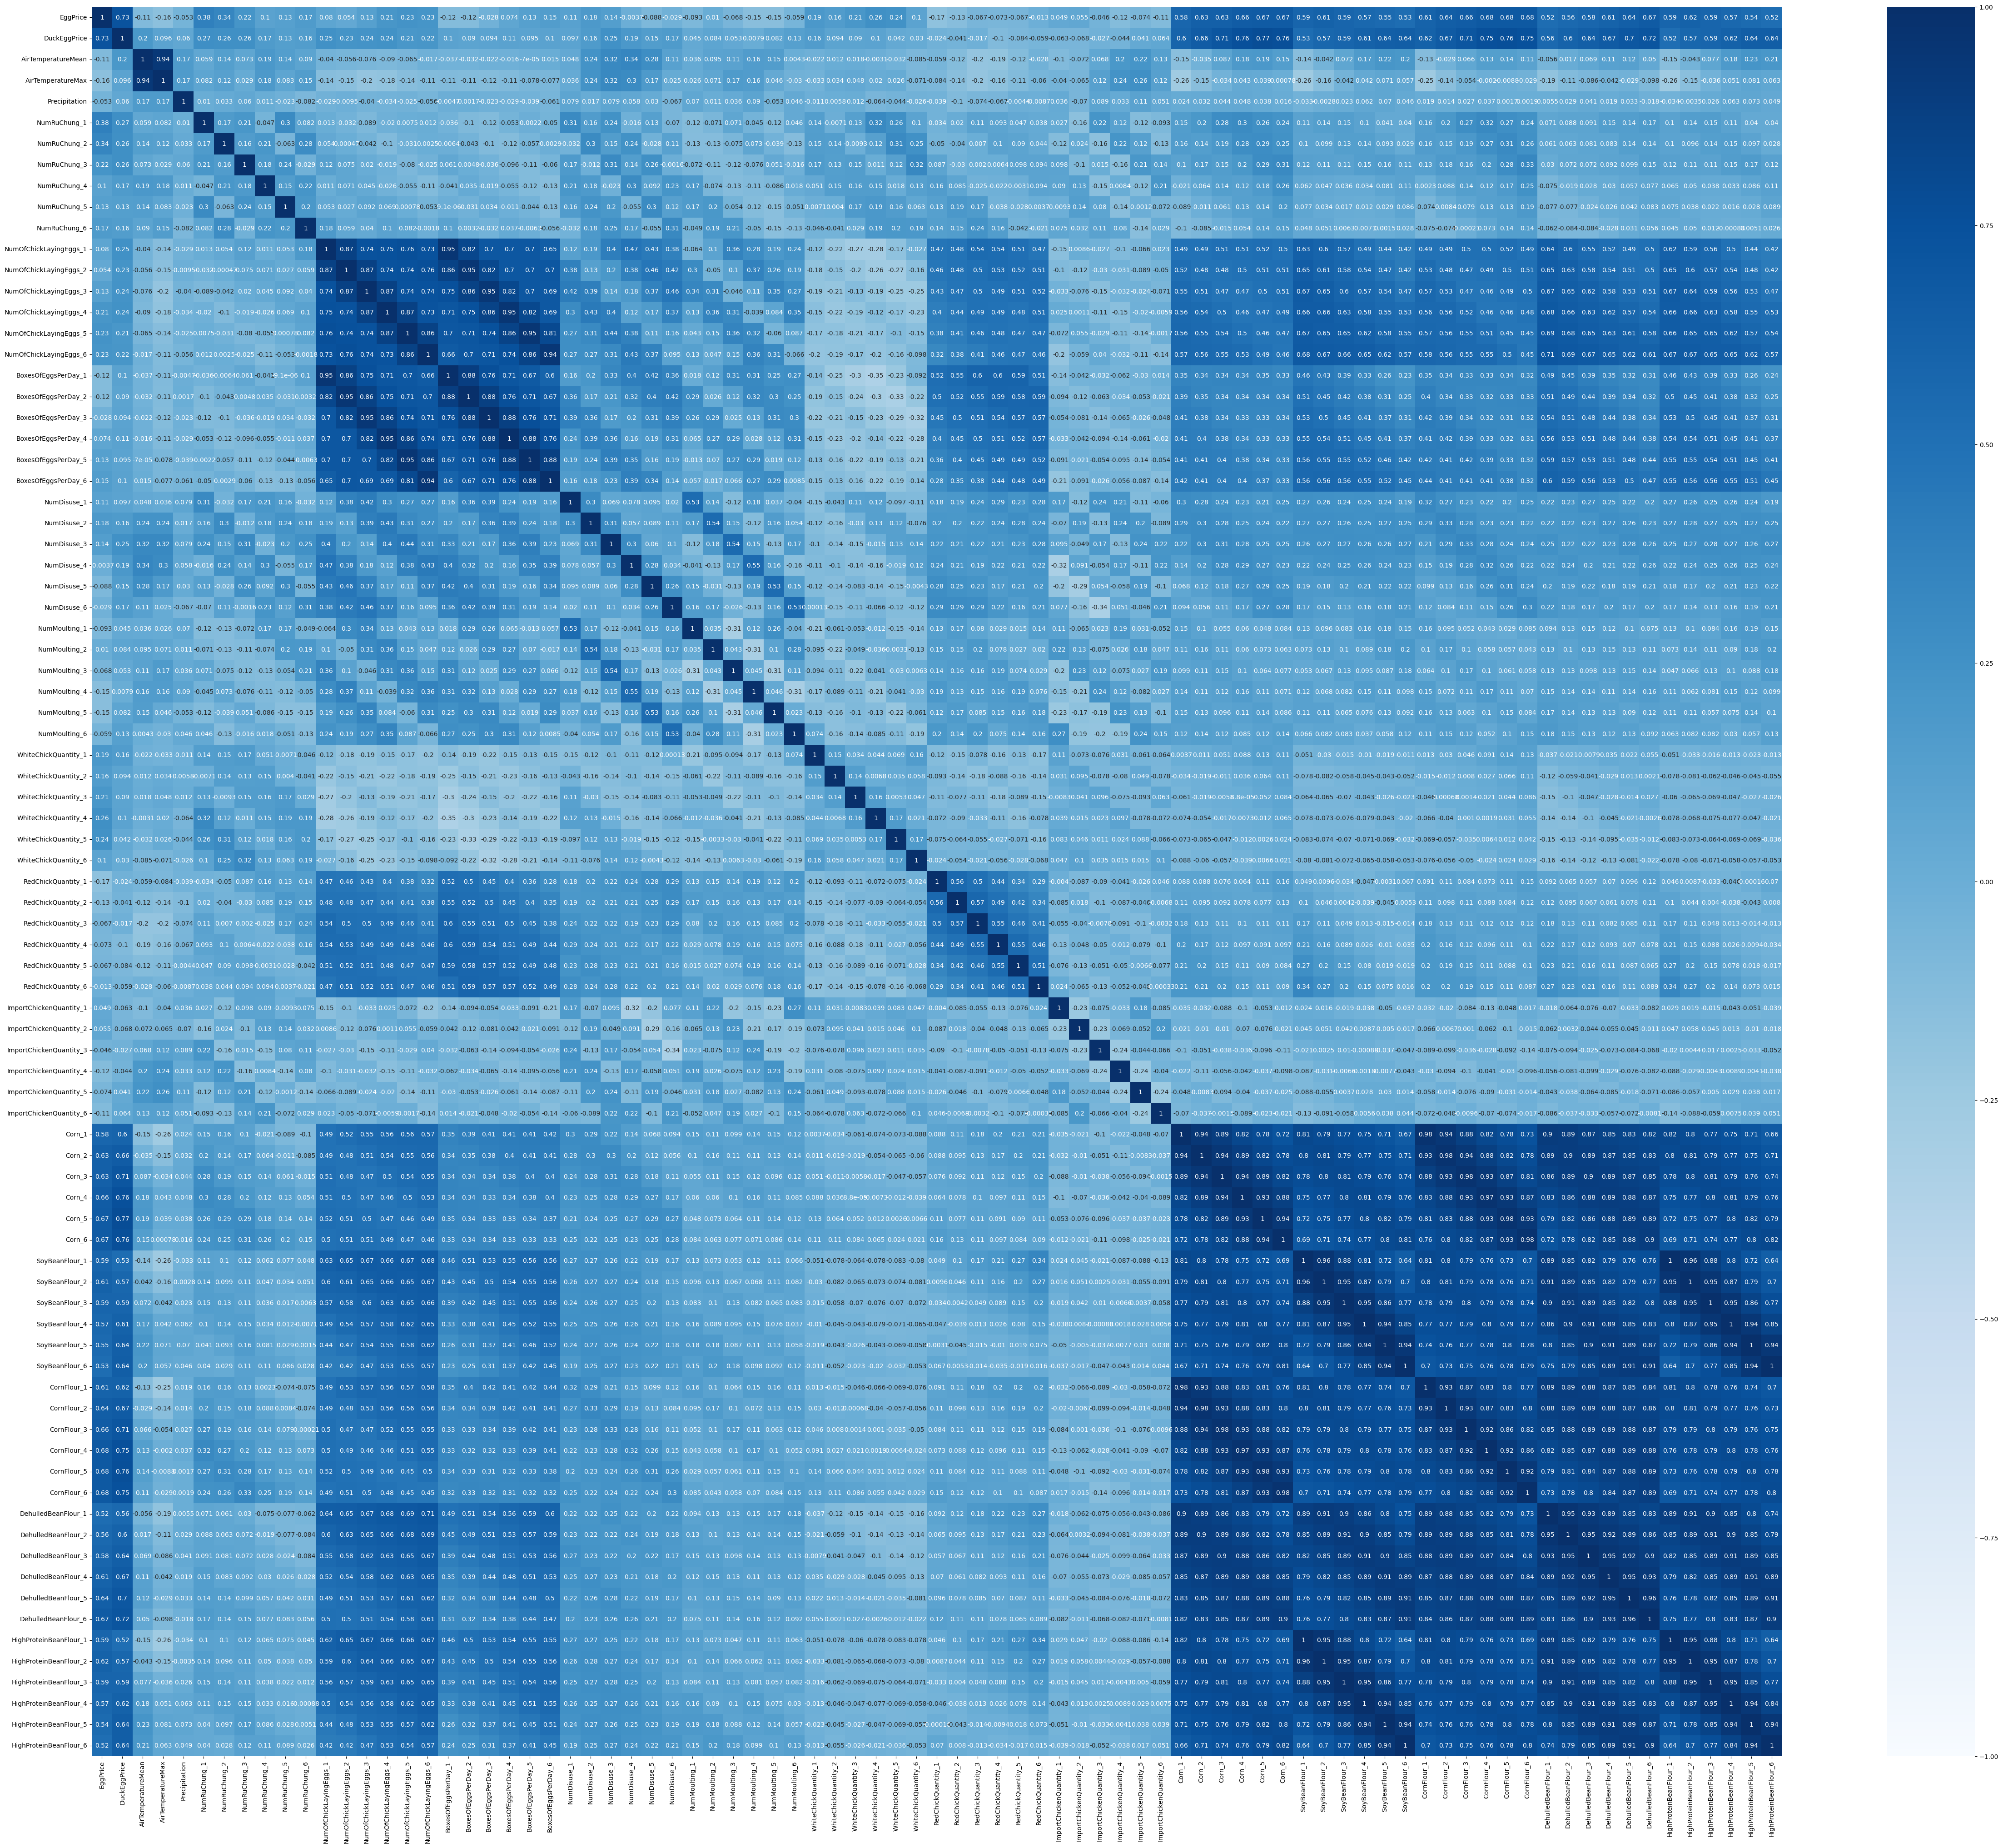

In [17]:
from ML.preprocessing import feature_selection

df_shift_fs, selectedFeatures, targetCorr = feature_selection(df_shift, type='corr')
df_shift_fs

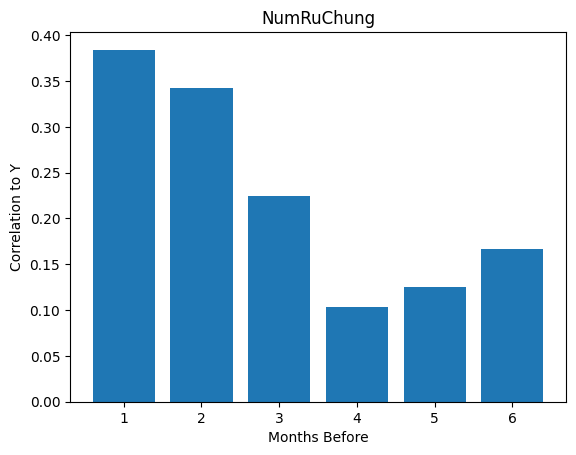

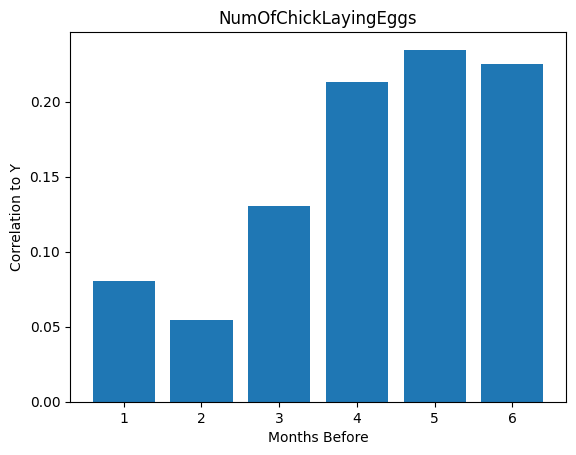

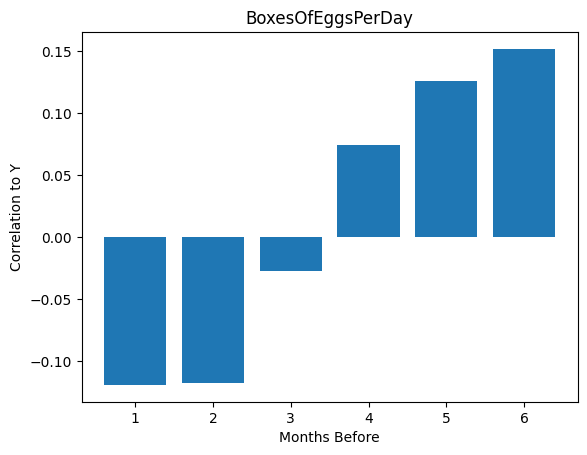

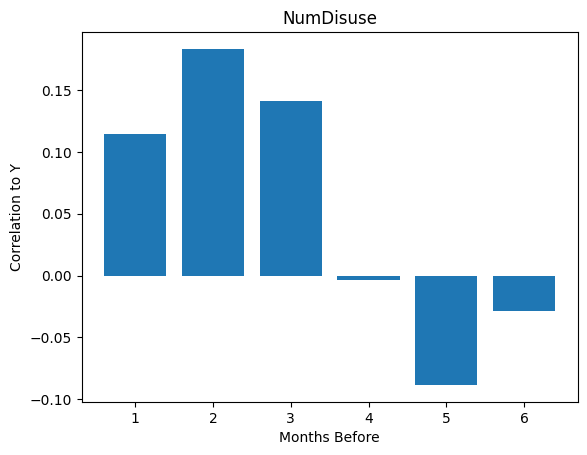

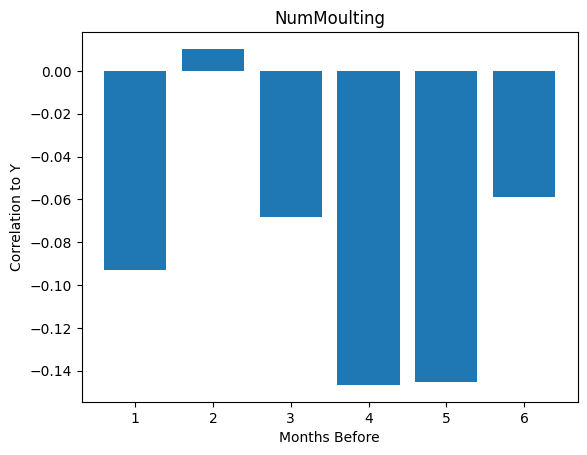

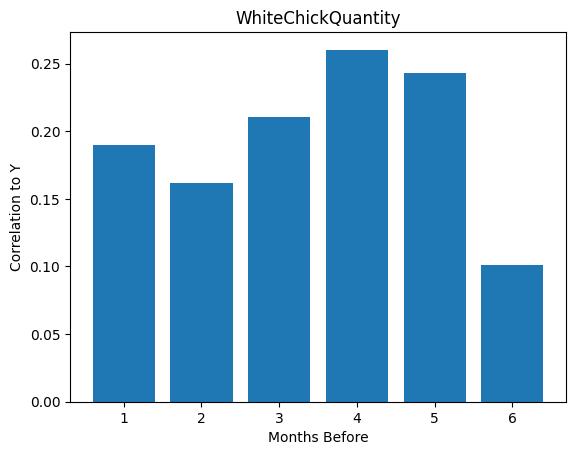

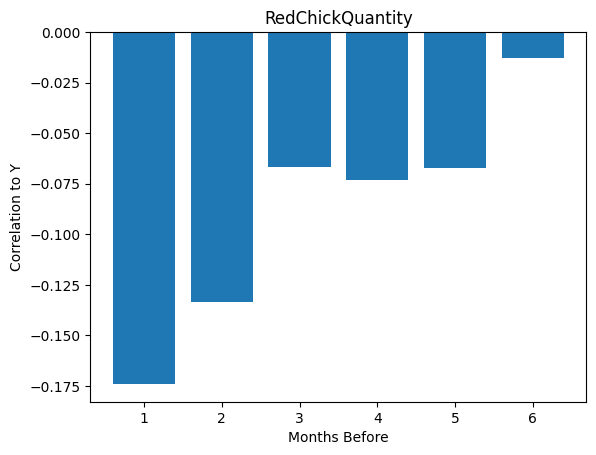

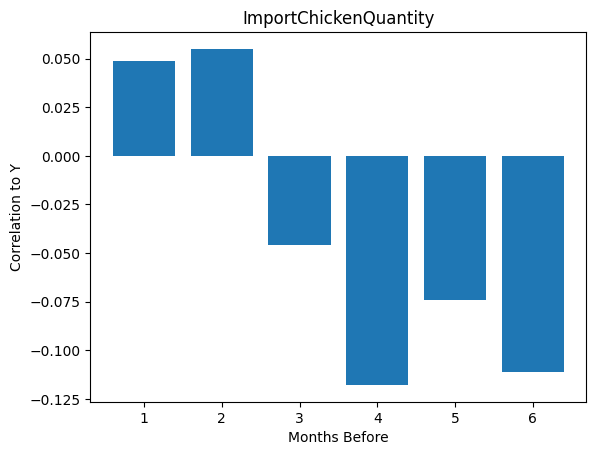

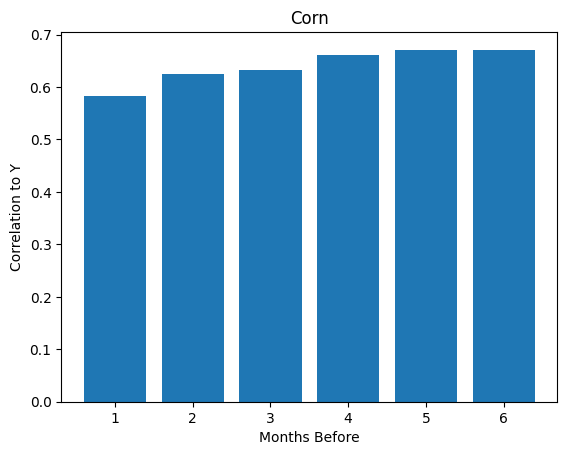

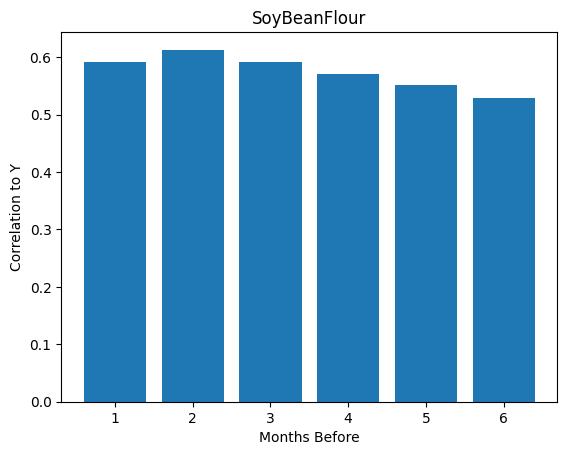

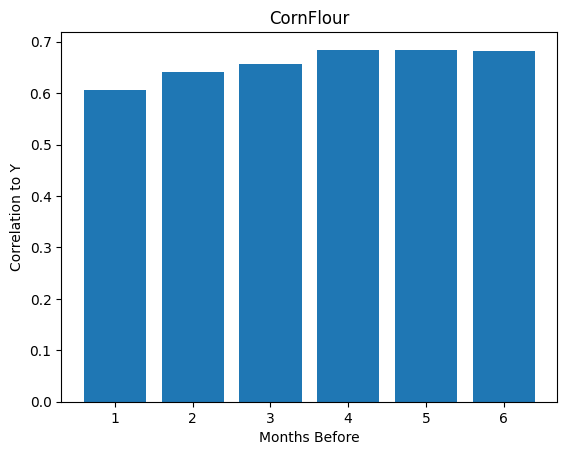

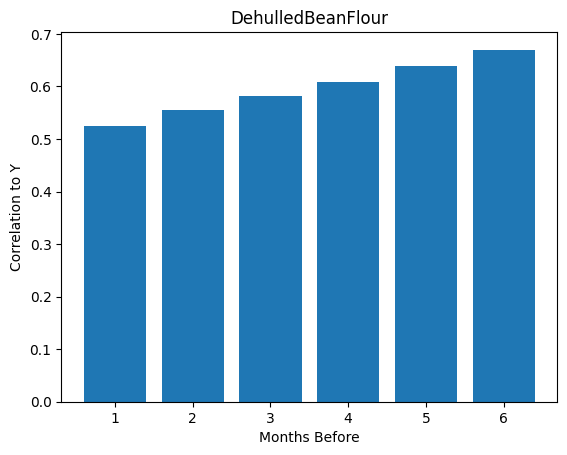

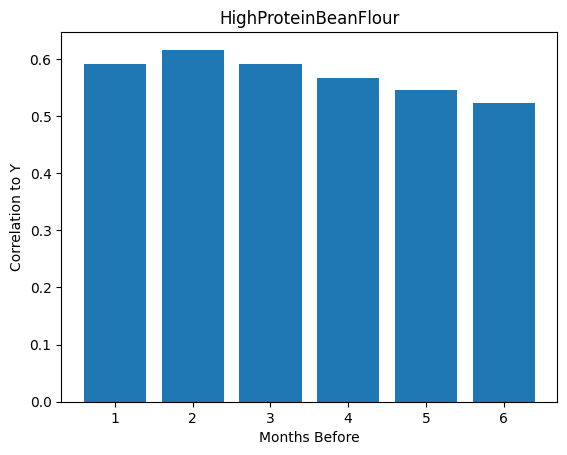

In [18]:
import matplotlib.pyplot as plt

month_before = 1
data = []

for col in extended_columns:
    if month_before <= 6:
        data.append((month_before, targetCorr[col]))
        month_before += 1

        if month_before == 7:
            # plot bar chart
            keys, values = zip(*data)

            plt.bar(keys, values)
            plt.xlabel('Months Before')
            plt.ylabel('Correlation to Y')
            plt.title(col[:-2])
            plt.savefig(f'./tempfigs/{col[:-2]}.png')

            plt.show()

            # reset
            data = []
            month_before = 1